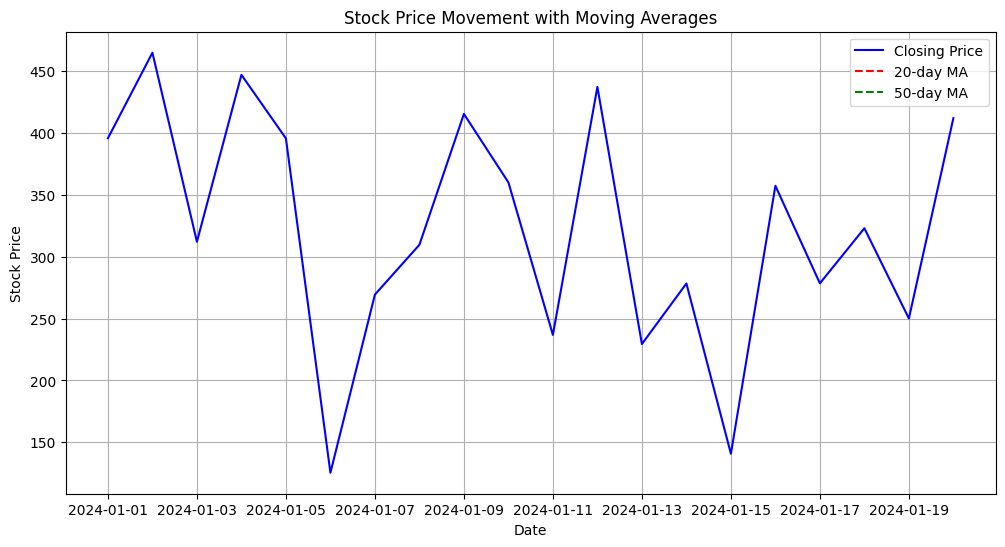

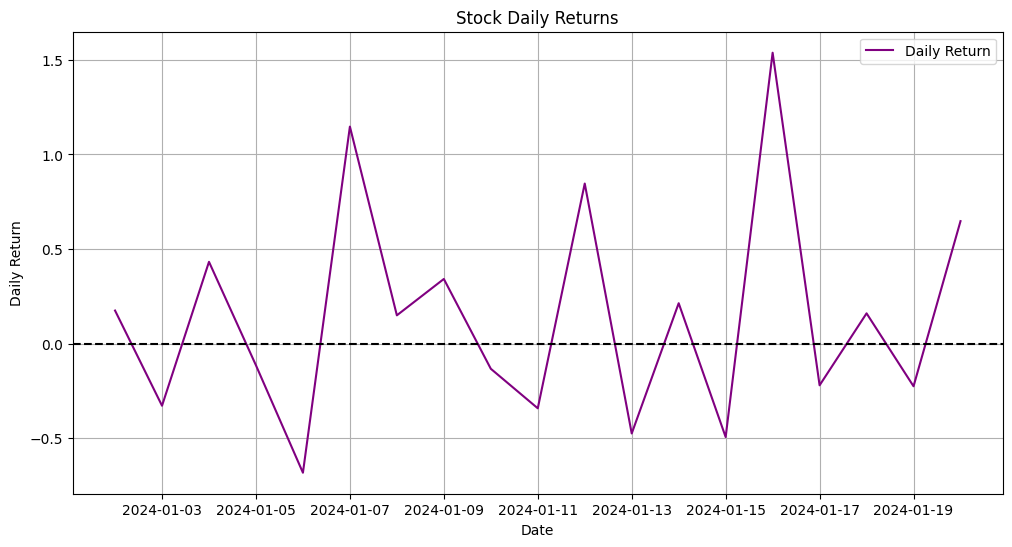

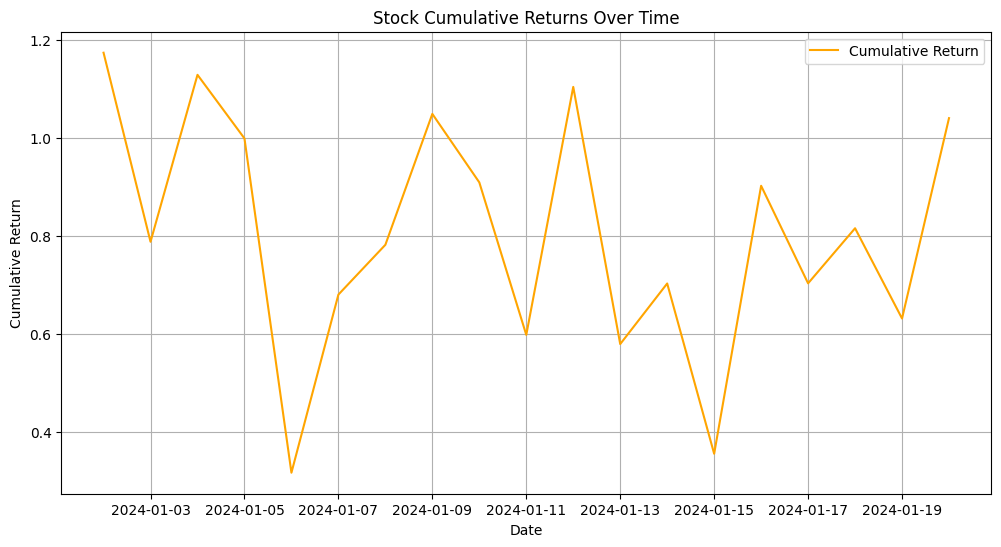

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load stock data from CSV
file_path = "/content/stock_data.csv"  # Replace with your actual CSV file path
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by Date
df = df.sort_values('Date')

# Set Date as index
df.set_index('Date', inplace=True)

# Calculate Moving Averages
df['20-day MA'] = df['Close'].rolling(window=20).mean()
df['50-day MA'] = df['Close'].rolling(window=50).mean()

# Calculate Daily Returns
df['Daily Return'] = df['Close'].pct_change()

# Calculate Cumulative Returns
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

# Plot Closing Price with Moving Averages
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue')
plt.plot(df.index, df['20-day MA'], label="20-day MA", color='red', linestyle='dashed')
plt.plot(df.index, df['50-day MA'], label="50-day MA", color='green', linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Movement with Moving Averages")
plt.legend()
plt.grid()
plt.show()

# Plot Daily Returns
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Daily Return'], label="Daily Return", color='purple')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Stock Daily Returns")
plt.legend()
plt.grid()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Cumulative Return'], label="Cumulative Return", color='orange')
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Stock Cumulative Returns Over Time")
plt.legend()
plt.grid()
plt.show()